In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Multiple metrics

In [9]:
def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure(figsize=(7,7))

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot
    
    # OrRd
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Use the custom colormap in the scatter plot
    # gist_rainbow
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [10]:
data = pd.read_csv('/workspaces/codespaces-jupyter/data/clustered.csv')
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

In [12]:
cmNB = confusion_matrix(y_test, y_test_pred)
print(cmNB)

[[33  2]
 [ 0 37]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.95      1.00      0.97        37

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



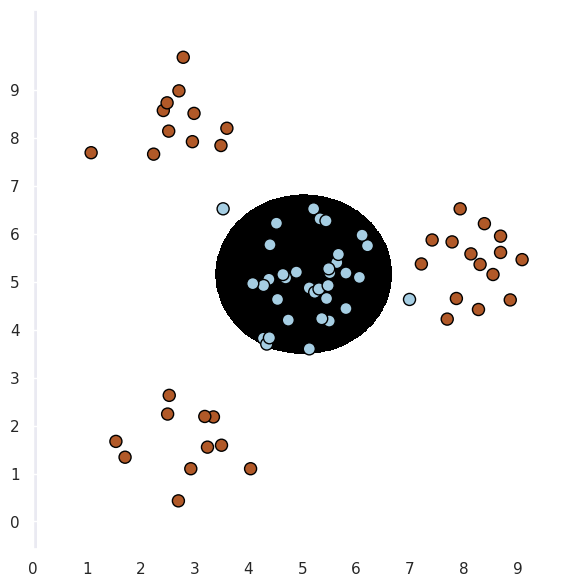

In [14]:
visualize_classifier(classifier, X_test, y_test)